# \begin{equation*} \frac{D \sigma}{D t} = \dot\sigma_{\theta} = \frac{\partial \sigma_{\theta}}{\partial \theta} \dot\theta + \frac{\partial \sigma_{\theta}}{\partial S} \dot S \end{equation*}
## **SOSE**

In [108]:
from dask_gateway import GatewayCluster

cluster = GatewayCluster()
cluster.scale(30)
#cluster.adapt(minimum=2, maximum=25)  # or cluster.scale(n) to a fixed size.
client = cluster.get_client()

In [112]:
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.18b3e7a7890048f3b8b8acd90ff469af Dashboard: /services/dask-gateway/clusters/prod.18b3e7a7890048f3b8b8acd90ff469af/status,Cluster Workers: 11 Cores: 22 Memory: 94.49 GB


In [107]:
client.close()
cluster.close()

In [3]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import fsspec
%matplotlib inline
import fastjmd95.jmd95numba as jmd95numba
#from fastjmd95 import jmd95numba
#from fastjmd95 import rho, drhods, drhodt
import dask.array as dsa

In [4]:
xr.set_options(display_style='text')

In [5]:
#coords = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/datasets/coords_wg.zarr')) not wg region
coords = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/coords.zarr'))
ds_tns = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/datasets/ds_tns.zarr'))
#ds_slt = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/datasets/ds_slt_wg.zarr')) old ds, surf/lin-fs terms 2D
#ds_tmp = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/datasets/ds_tmp_wg.zarr')) old ds, surf/lin-fs terms 2D
ds_slt = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/budget_slt.zarr'))
ds_tmp = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/budget_th.zarr'))
ds_vel = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/datasets/ds_vel.zarr'))
ds = xr.merge([ds_tns, ds_slt, ds_tmp, ds_vel])

In [6]:
coords = coords.roll(XC=700, XG=700)
ds = ds.roll(XC=700, XG=700)

<ipython-input-6-cc4a553a0312>:1: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  coords = coords.roll(XC=700, XG=700)
<ipython-input-6-cc4a553a0312>:2: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = ds.roll(XC=700, XG=700)


In [134]:
ds_tmp_rolled = ds_tmp.roll(XC=700)
ds_slt_rolled = ds_slt.roll(XC=700)

<ipython-input-134-d3748739752a>:1: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds_tmp_rolled = ds_tmp.roll(XC=700)
<ipython-input-134-d3748739752a>:2: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds_slt_rolled = ds_slt.roll(XC=700)


In [7]:
ds

<xarray.Dataset>
Dimensions:                   (XC: 2160, XG: 2160, YC: 320, YG: 320, Z: 42, Zl: 42, time: 438)
Coordinates:
  * XC                        (XC) float32 243.41667 243.58334 ... 243.25
  * YC                        (YC) float32 -77.87497 -77.7083 ... -24.7083
  * Z                         (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                      (time) datetime64[ns] 2005-01-06 ... 2010-12-31
  * XG                        (XG) float32 243.33334 243.5 ... 243.0 243.16667
  * YG                        (YG) float32 -77.9583 -77.79163 ... -24.791632
  * Zl                        (Zl) float32 0.0 -10.0 -21.0 ... -5200.0 -5450.0
Data variables:
    SALT                      (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    THETA                     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_horiz_adv_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_horiz_diff_flux_SLT  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_adv_flux_SLT    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_diff_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    lin_fs_correction_SLT     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    surface_flux_conv_SLT     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    total_tendency_SLT_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_horiz_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_horiz_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_adv_flux_TH     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_diff_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    lin_fs_correction_TH      (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    surface_flux_conv_TH      (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    sw_flux_conv_TH           (time, YC, XC, Z) float32 dask.array<chunksize=(1, 320, 2160, 42), meta=np.ndarray>
    total_tendency_TH_truth   (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    UVEL                      (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    VVEL                      (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    WVEL                      (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>

In [8]:
#WG boundaries (80˚S, 62˚S, 65˚W, 30˚E)
#WG model's boundaries after .roll(XC=700) (-77.87497˚S, -62.041634˚S; 295.08334W, 30.083334E)
lower_lat = 0 #YG=-77.9583
upper_lat = 95
left_lon =  310
right_lon = 880

YG_upper = 96 #-61.9583
#XG_left = 311 #295.1667
XG_right = 881 #30.166668

In [9]:
#set the boundaries
lat_range_noface = dict(YC=slice(lower_lat, upper_lat))
lon_range_noface = dict(XC=slice(left_lon, right_lon))

In [10]:
#set the boundaries
lat_range = dict(YC=slice(lower_lat, upper_lat), YG=slice(lower_lat, YG_upper))
lon_range = dict(XC=slice(left_lon, right_lon), XG=slice(left_lon, XG_right))

In [11]:
coords_wg = coords.isel(**lat_range, **lon_range)
ds_wg = ds.isel(**lat_range, **lon_range)

In [12]:
pref = 2000

# <font color='Green'> \begin{equation*} Temperature \end{equation*} </font>

## <font color='Green'> \begin{equation*} \frac{\partial \rho}{\partial \theta}\end{equation*} </font>

In [13]:
ds_wg.THETA

<xarray.DataArray 'THETA' (time: 438, Z: 42, YC: 95, XC: 570)>
dask.array<getitem, shape=(438, 42, 95, 570), dtype=float32, chunksize=(1, 42, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 295.08334 295.25 295.4167 ... 29.75 29.916668
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -62.374966 -62.2083
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Attributes:
    long_name:      Potential Temperature
    standard_name:  THETA
    units:          degC

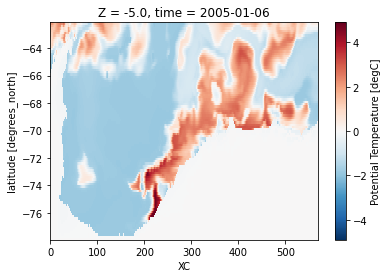

In [111]:
ds_wg.THETA[0,0].drop('XC').plot()

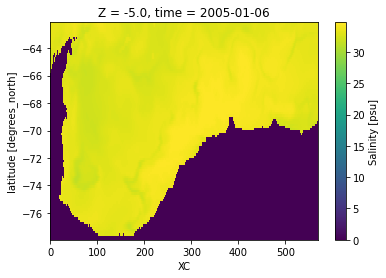

In [110]:
ds_wg.SALT[0,0].drop('XC').plot()

In [16]:
ds.THETA.data

,Array,Chunk
Bytes,50.86 GB,116.12 MB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,2629 Tasks,438 Chunks
Type,float32,numpy.ndarray


In [17]:
ds_wg.THETA.data

,Array,Chunk
Bytes,3.98 GB,9.10 MB
Shape,"(438, 42, 95, 570)","(1, 42, 95, 570)"
Count,3067 Tasks,438 Chunks
Type,float32,numpy.ndarray


### 5. **`dsa.map_blocks()`-`fastjmd95`-model data**
Runtime:

In [60]:
drhodt_wg = dsa.map_blocks(jmd95numba.drhodt, 
                            ds_wg.SALT.data, 
                            ds_wg.THETA.data, pref,
                            dtype=ds_wg.THETA.dtype)#.load()
drhodt_wg

,Array,Chunk
Bytes,3.98 GB,9.10 MB
Shape,"(438, 42, 95, 570)","(1, 42, 95, 570)"
Count,6572 Tasks,438 Chunks
Type,float32,numpy.ndarray


In [61]:
drhodt = dsa.map_blocks(jmd95numba.drhodt, 
                        ds.SALT.data, 
                        ds.THETA.data, pref,
                        dtype=ds.THETA.dtype)#.load()
drhodt

,Array,Chunk
Bytes,50.86 GB,116.12 MB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,5696 Tasks,438 Chunks
Type,float32,numpy.ndarray


In [59]:
type(drhodt)

dask.array.core.Array

In [66]:
%time drhodt_wg.mean(axis=(0, 1,)).compute()

CPU times: user 1.05 s, sys: 33.8 ms, total: 1.09 s
Wall time: 33.3 s


array([[-0.00478695, -0.00478695, -0.00478695, ..., -0.00478695,
        -0.00478695, -0.00478695],
       [-0.00478695, -0.00478695, -0.00478695, ..., -0.00478695,
        -0.00478695, -0.00478695],
       [-0.00478695, -0.00478695, -0.00478695, ..., -0.00478695,
        -0.00478695, -0.00478695],
       ...,
       [-0.1004128 , -0.10041294, -0.10036682, ..., -0.10846028,
        -0.10850379, -0.10853367],
       [-0.10357573, -0.1009112 , -0.09555993, ..., -0.10834187,
        -0.10838421, -0.1084111 ],
       [-0.09877244, -0.09607681, -0.09334263, ..., -0.10827856,
        -0.10831393, -0.10833538]], dtype=float32)

In [68]:
%time drhodt.mean(axis=(0, 1,)).compute()

CPU times: user 949 ms, sys: 50.8 ms, total: 999 ms
Wall time: 54.7 s


array([[-0.00478695, -0.00478695, -0.00478695, ..., -0.00478695,
        -0.00478695, -0.00478695],
       [-0.00478695, -0.00478695, -0.00478695, ..., -0.00478695,
        -0.00478695, -0.00478695],
       [-0.00478695, -0.00478695, -0.00478695, ..., -0.00478695,
        -0.00478695, -0.00478695],
       ...,
       [-0.16931999, -0.16931838, -0.16931146, ..., -0.17225058,
        -0.17226288, -0.17227   ],
       [-0.1693209 , -0.16932145, -0.16931662, ..., -0.17224328,
        -0.17225844, -0.17226723],
       [-0.16909692, -0.16909528, -0.16908666, ..., -0.17204258,
        -0.17204542, -0.17205133]], dtype=float32)

In [72]:
drhodt_wg.compute()

CommClosedError: in <closed TLS>: Stream is closed

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.8/ssl.py", line 1309, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLCertVerificationError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1124)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/p

In [44]:
drhodt_xr = xr.Dataset({'drhodt' : (['time', 'Z','YC','XC'], drhodt)})

In [123]:
(-drhodt[0,0]).plot()

AttributeError: 'Array' object has no attribute 'plot'

## <font color='Green'> \begin{equation*} \frac{\partial \rho}{\partial \theta} \dot \theta \end{equation*} </font>

In [135]:
ds_tmp_wg = ds_tmp_rolled.isel(**lat_range_noface, **lon_range_noface)

In [136]:
ds_tmp_wg

<xarray.Dataset>
Dimensions:                  (XC: 570, YC: 95, Z: 42, time: 438)
Coordinates:
  * XC                       (XC) float32 295.08334 295.25 ... 29.75 29.916668
  * YC                       (YC) float32 -77.87497 -77.7083 ... -62.2083
  * Z                        (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                     (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    lin_fs_correction_TH     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    surface_flux_conv_TH     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    sw_flux_conv_TH          (time, YC, XC, Z) float32 dask.array<chunksize=(1, 95, 570, 42), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>

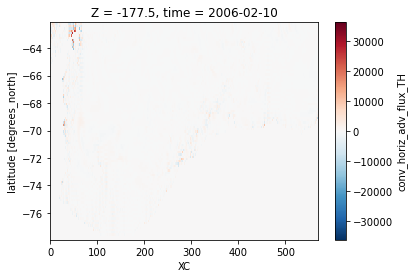

In [137]:
ds_wg.conv_horiz_adv_flux_TH[80,10].drop('XC').plot()

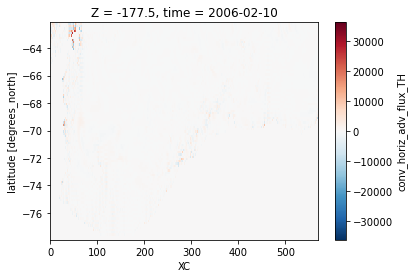

In [139]:
ds_tmp_wg.conv_horiz_adv_flux_TH[80,10].drop('XC').plot()

In [140]:
drhodt_wg.shape

(438, 42, 95, 570)

In [141]:
ds_tmp_wg['sw_flux_conv_TH'] = ds_tmp_wg.sw_flux_conv_TH.transpose('time', 'Z', 'YC', 'XC')

In [142]:
ds_tmp_wg#.sw_flux_conv_TH

<xarray.Dataset>
Dimensions:                  (XC: 570, YC: 95, Z: 42, time: 438)
Coordinates:
  * XC                       (XC) float32 295.08334 295.25 ... 29.75 29.916668
  * YC                       (YC) float32 -77.87497 -77.7083 ... -62.2083
  * Z                        (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                     (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    lin_fs_correction_TH     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    surface_flux_conv_TH     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    sw_flux_conv_TH          (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>

In [143]:
ds_sig_theta = (drhodt_wg * ds_tmp_wg)#.chunk({'XC':-1, 'YC':-1, 'Z':-1, 'time':1})

In [144]:
ds_sig_theta

<xarray.Dataset>
Dimensions:                  (XC: 570, YC: 95, Z: 42, time: 438)
Coordinates:
  * XC                       (XC) float32 295.08334 295.25 ... 29.75 29.916668
  * YC                       (YC) float32 -77.87497 -77.7083 ... -62.2083
  * Z                        (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                     (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    lin_fs_correction_TH     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    surface_flux_conv_TH     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    sw_flux_conv_TH          (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>

In [145]:
rhs_theta = (ds_sig_theta.conv_horiz_adv_flux_TH + 
              ds_sig_theta.conv_horiz_diff_flux_TH + 
              ds_sig_theta.conv_vert_adv_flux_TH +
              ds_sig_theta.conv_vert_diff_flux_TH + 
              ds_sig_theta.surface_flux_conv_TH + 
              ds_sig_theta.sw_flux_conv_TH)#.load()

lhs_theta = ds_sig_theta.total_tendency_TH_truth#.load()

## **Why does it plot an output but I can't run `drhodt_wg.compute()` without it crashing?**

In [147]:
client.restart()

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.18b3e7a7890048f3b8b8acd90ff469af Dashboard: /services/dask-gateway/clusters/prod.18b3e7a7890048f3b8b8acd90ff469af/status,Cluster Workers: 30 Cores: 60 Memory: 257.70 GB


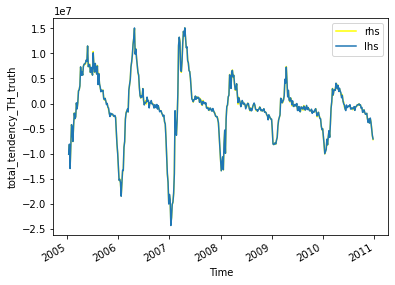

In [148]:
#checking equality
rhs_theta[1:-1].sum(['XC', 'YC', 'Z']).plot(label='rhs', color='yellow')
lhs_theta[1:-1].sum(['XC', 'YC', 'Z']).plot(label='lhs')
plt.legend();

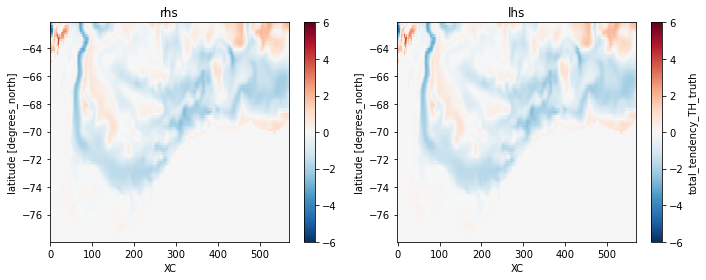

In [150]:
#checking equality
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,4))
rhs_theta[1:-1].mean(dim=['time', 'Z']).drop('XC').plot(ax=ax0, vmax=6)
ax0.set_title('rhs')
lhs_theta[1:-1].mean(dim=['time', 'Z']).drop('XC').plot(ax=ax1, vmax=6)
ax1.set_title('lhs')
plt.tight_layout();

In [151]:
rhs_vars = [dvar for dvar in ds_sig_theta.data_vars
            if dvar != 'total_tendency_TH_truth']
total_tendency_check = sum([ds_sig_theta[dvar] for dvar in rhs_vars])
total_tendency_check

<xarray.DataArray (time: 438, Z: 42, YC: 95, XC: 570)>
dask.array<add, shape=(438, 42, 95, 570), dtype=float32, chunksize=(1, 42, 95, 570), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 295.08334 295.25 295.4167 ... 29.75 29.916668
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -62.374966 -62.2083
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31

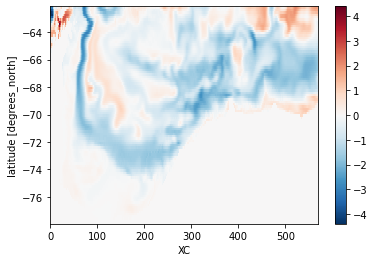

In [153]:
total_tendency_check.mean(dim=['time', 'Z']).drop('XC').plot()

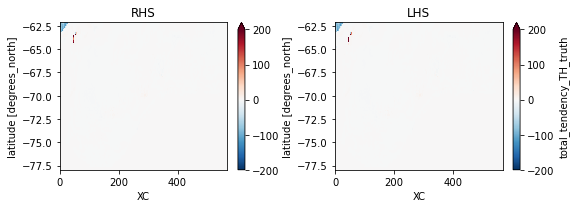

In [152]:
#checking equality
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(8, 3))
total_tendency_check[200, 0].drop('XC').plot(ax=ax0, robust=True, vmax=200)
ax0.set_title('RHS')

ds_sig_theta.total_tendency_TH_truth[200, 0].drop('XC').plot(ax=ax1, robust=True, vmax=200)
ax1.set_title('LHS')
plt.tight_layout();

In [154]:
ds_sig_theta

<xarray.Dataset>
Dimensions:                  (XC: 570, YC: 95, Z: 42, time: 438)
Coordinates:
  * XC                       (XC) float32 295.08334 295.25 ... 29.75 29.916668
  * YC                       (YC) float32 -77.87497 -77.7083 ... -62.2083
  * Z                        (Z) float32 -5.0 -15.5 -27.0 ... -5325.0 -5575.0
  * time                     (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    lin_fs_correction_TH     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    surface_flux_conv_TH     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    sw_flux_conv_TH          (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 95, 570), meta=np.ndarray>

# <font color='Green'> \begin{equation*} Salinity \end{equation*} </font>

## <font color='Green'> \begin{equation*} \frac{\partial \rho}{\partial S} \end{equation*} </font>

In [22]:
drhods = xr.apply_ufunc(jmd95numba.drhods, ds_wg.SALT, ds_wg.THETA, pref,
                        output_dtypes=[ds_wg.SALT.dtype],
                        dask='parallelized').reset_coords(drop=True).load()

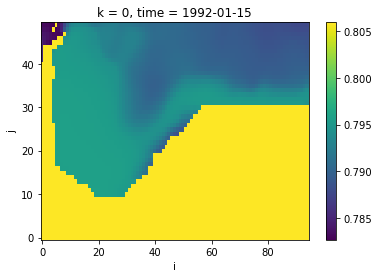

In [23]:
drhods[0,0].plot()

## <font color='Green'> \begin{equation*} \frac{\partial \rho}{\partial S} \dot S \end{equation*} </font>

In [24]:
ds_sig_salt = drhods * ds_slt

In [25]:
ds_sig_salt

<xarray.Dataset>
Dimensions:     (i: 95, j: 50, k: 50, time: 288)
Coordinates:
  * k           (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time        (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
Dimensions without coordinates: i, j
Data variables:
    G_adv       (time, k, j, i) float64 dask.array<chunksize=(48, 50, 50, 67), meta=np.ndarray>
    G_adv_conv  (time, k, j, i) float64 dask.array<chunksize=(48, 50, 50, 67), meta=np.ndarray>
    G_diff      (time, k, j, i) float64 dask.array<chunksize=(48, 50, 50, 67), meta=np.ndarray>
    G_forc      (time, k, j, i) float64 dask.array<chunksize=(48, 50, 50, 67), meta=np.ndarray>
    G_tot       (time, k, j, i) float64 dask.array<chunksize=(48, 50, 50, 67), meta=np.ndarray>

In [26]:
rhs_salt = (ds_sig_theta.conv_horiz_adv_flux_SLT + 
            ds_sig_theta.conv_horiz_diff_flux_SLT + 
            ds_sig_theta.conv_vert_adv_flux_SLT +
            ds_sig_theta.conv_vert_diff_flux_SLT + 
            ds_sig_theta.surface_flux_conv_SLT).load()

lhs_salt = ds_sig_salt.total_tendency_SLT_truth.load()

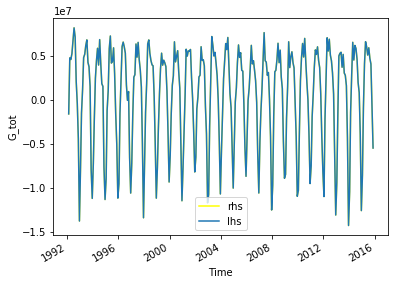

In [27]:
#checking equality
rhs_salt[1:-1].sum(['XC', 'YC', 'Z']).plot(label='rhs', color='yellow')
lhs_salt[1:-1].sum(['XC', 'YC', 'Z']).plot(label='lhs')
plt.legend();

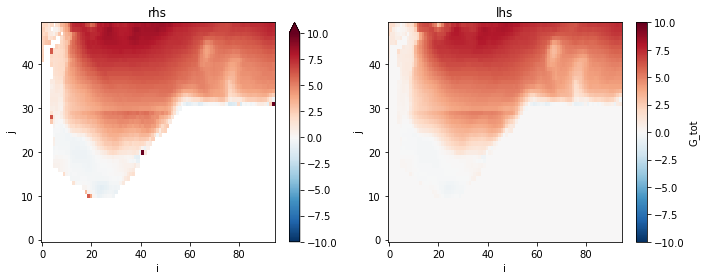

In [29]:
#checking equality
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,4))
rhs_salt[1:-1].mean(dim=['time', 'Z']).plot(ax=ax0, vmax=10)
ax0.set_title('rhs')
lhs_salt[1:-1].mean(dim=['time', 'Z']).plot(ax=ax1, vmax=10)
ax1.set_title('lhs')
plt.tight_layout();

In [30]:
rhs_vars_salt = [dvar for dvar in ds_sig_salt.data_vars
            if dvar != 'total_tendency_SLT_truth']
total_tendency_check_salt = sum([ds_sig_salt[dvar] for dvar in rhs_vars_salt])
total_tendency_check_salt

<xarray.DataArray (time: 288, k: 50, j: 50, i: 95)>
dask.array<add, shape=(288, 50, 50, 95), dtype=float64, chunksize=(48, 50, 50, 67), chunktype=numpy.ndarray>
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
Dimensions without coordinates: j, i

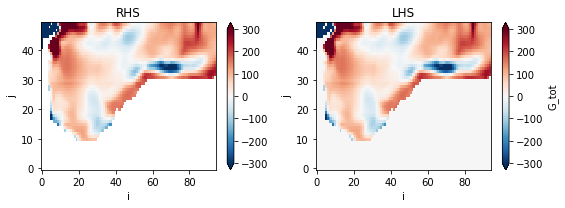

In [31]:
#checking equality
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(8, 3))
total_tendency_check_salt[200, 0].plot(ax=ax0, robust=True, vmax=300)
ax0.set_title('RHS')

ds_sig_salt.total_tendency_SLT_truth[200, 0].plot(ax=ax1, robust=True, vmax=300)
ax1.set_title('LHS')
plt.tight_layout();

## Saving Data

In [32]:
drhodts = xr.merge([drhodt.rename('drhodt'), drhods.rename('drhods')])

In [33]:
import json
with open('/home/jovyan/WMT/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [111]:
#saving theta component of drho/dtime
gcsmap_sig_theta = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/ds_sig_theta.zarr')
ds_sig_theta.to_zarr(gcsmap_sig_theta, mode='w')

In [34]:
#saving salt component of drho/dtime
gcsmap_sig_salt = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/ds_sig_salt_new.zarr')
ds_sig_salt.to_zarr(gcsmap_sig_salt, mode='w')

In [35]:
#saving rhodt and drhods
gcsmap_drhodts = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/drhodts_new.zarr')
drhodts.to_zarr(gcsmap_drhodts, mode='w')